In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read Data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only bmi feature have some missing data

In [7]:
# we will fill it with the median of the same column
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
#Drop extra values
df.drop(['id'],axis=1,inplace=True)

In [10]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)
df.shape

(5110, 11)

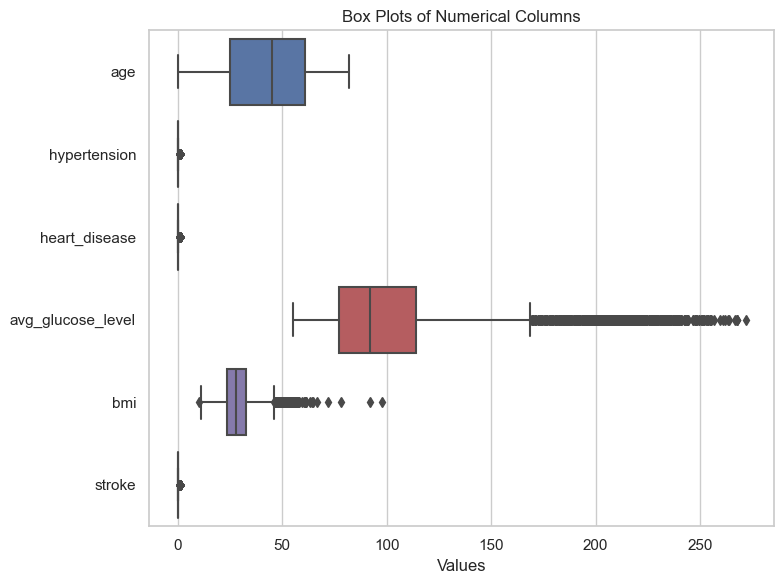

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))  # Adjust figure size
sns.set(style="whitegrid")
sns.boxplot(data=numerical_columns, orient="h")  # orient="h" for horizontal orientation
plt.title('Box Plots of Numerical Columns')
plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [13]:
# Define a function to detect and remove outliers
def remove_outliers(column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    
    # Remove outliers
    cleaned_column = column[~outliers]
    
    return cleaned_column

# Remove outliers using IQR for each numerical column
cleaned_numerical_columns = numerical_columns.apply(remove_outliers)

# Concatenate cleaned numerical columns with non-numeric columns to get the cleaned DataFrame
cleaned_df = pd.concat([df.drop(columns=numerical_columns.columns), cleaned_numerical_columns], axis=1)

# Display summary statistics after outlier removal
print("Summary Statistics after Outlier Removal:")
print(cleaned_df.describe())


Summary Statistics after Outlier Removal:
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000        4612.0         4834.0        4483.000000   
mean     43.226614           0.0            0.0          91.435077   
std      22.612647           0.0            0.0          22.635346   
min       0.080000           0.0            0.0          55.120000   
25%      25.000000           0.0            0.0          75.060000   
50%      45.000000           0.0            0.0          87.960000   
75%      61.000000           0.0            0.0         103.930000   
max      82.000000           0.0            0.0         168.680000   

               bmi  stroke  
count  4984.000000  4861.0  
mean     28.252448     0.0  
std       6.629493     0.0  
min      11.300000     0.0  
25%      23.600000     0.0  
50%      28.100000     0.0  
75%      32.300000     0.0  
max      46.200000     0.0  
